In [1]:
from classes.QCircuits import *
from classes.QnnTorchConnector import *
from classes.CsvDataset import *
from classes.Utils import *

from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import Statevector
from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B, COBYLA

import numpy as np
from math import log
from pandas import read_csv, DataFrame, concat

import matplotlib.pyplot as plt

import torch as T

from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split

configrc.store_credentials:WARNING:2022-06-04 23:28:33,696: Credentials already present. Set overwrite=True to overwrite.


qasm_simulator
QPU Simulator Enabled
QPU Enabled


In [2]:
seed = 42
np.random.seed(seed)
T.manual_seed(seed)

# BANKNOTE DATASET. 
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'
n=2

dataset_name = 'banknote'
save_path = 'loss_data/'+dataset_name+'_'

df = read_csv(url, header=None)
print(df.describe())   
epochs = 15


dataset = CsvDataset(df=df, features=(0,2), target=4)

train_dl, test_dl = create_train_test_dataloader(dataset, batch_size=10)

                 0            1            2            3            4
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


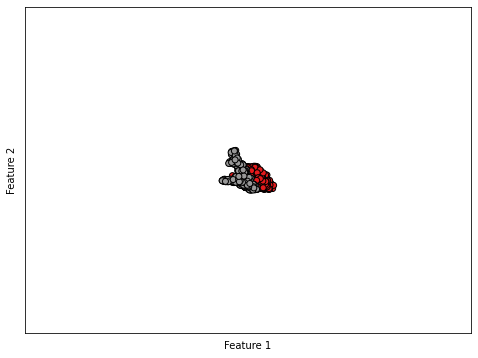

In [3]:
# only plots two features
# plot_two_features_classification(df.iloc[:,0],df.iloc[:,2], df.iloc[:,4], 'figures/'+dataset_name+'.png')
plot_two_features_classification(dataset.X[:,0],dataset.X[:,1], dataset.y)

In [4]:
cnn1, cnn2 = create_cnn_and_fit_and_store_result(save_path, dataset, n, epochs)

--------create model-----------
param count is : 15
Running epoch 1 of 15
test_dl_is_not None
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Running epoch 2 of 15
test_dl_is_not None
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend


Running epoch 5 of 15
test_dl_is_not None
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Running epoch 6 of 15
test_dl_is_not None
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backend
Not Using backen

In [ ]:
create_qnn_and_fit_and_store_result(save_path, circuit_type="ZzFeatureMapRealAmplitudeCircuit", dataset=dataset, n=n, epochs=epochs)

create_qnn_and_fit_and_store_result(save_path, circuit_type="CombinedQnn", dataset=dataset, n=n, epochs=epochs)


--------create model-----------
param count is : 4
Running epoch 1 of 15


In [ ]:
create_hybridqnn_and_fit_and_store_result(save_path, "ZzFeatureMapRealAmplitudeCircuit", dataset, n, epochs)

create_hybridqnn_and_fit_and_store_result(save_path, "CombinedQnn", dataset, n, epochs)
    

In [ ]:
# import qiskit
# qiskit.__qiskit_version__